In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [17]:
#read the sdf file of 10 predictable molecules
ligands_996 =Chem.SDMolSupplier('ndonor.sdf')
#create the ecfp fingerprint
#x is the input, 2 is the radius
morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=256) for x in ligands_996]
efp_996=np.array(morgan_996)
efp_996.shape

(10, 256)

In [18]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('ecfp_ndonor.csv')

In [ ]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [71]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_996.csv')#Put address
efp_996=pd.read_csv('ecfp_256.csv')
efp_996=np.array(efp_996)
Isomer=input[['Isomer']].copy()
X_996=np.concatenate((efp_996,Isomer),axis=1)
print(len(efp_996))
#Isomer_positive=input_positive[['Isomer']].copy()
#X_996=np.concatenate((efp_996,Isomer_positive),axis=1)
#X_785=col_normalize(X_785)
X_996.shape

996


(996, 258)

In [72]:
#assign the Hammett constants to Y
Y_996=input[['Hammett Constant']].copy()
Y_996=np.array(Y_996)

In [75]:
efp_ndonor=pd.read_csv('ecfp_ndonor.csv')
efp_ndonor=np.array(efp_ndonor)
X_ndonor=efp_ndonor
X_ndonor.shape

(10, 258)

In [76]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((996,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((996,1000),dtype=float)
Y_target_train=np.zeros((996,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [77]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [78]:
# list(X_996).index("infinity")

In [79]:
for m in range(0,1000):
    #positive part
    index_996=np.random.choice(996, size=996, replace=1)
    X_train=X_996[index_996]
    Y_train=Y_996[index_996]
    X_test=np.delete(X_train,index_996,axis=0)
    Y_test=np.delete(Y_train,index_996,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_996)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [80]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 3.24130000e-01,  6.53500000e-02,  1.14480000e-01, -4.60290000e-01,
       -5.92390000e-01,  3.60550000e-01,  4.46760000e-01,  3.04910000e-01,
        2.18660000e-01,  5.39710000e-01,  5.84070000e-01,  6.87630000e-01,
        7.48120000e-01,  3.31660000e-01,  3.61080000e-01,  2.67280000e-01,
        2.67420000e-01,  4.55370000e-01,  5.21410000e-01,  1.89260000e-01,
        1.17540000e-01,  3.92760000e-01,  4.17620000e-01,  4.07240000e-01,
        5.10350000e-01,  4.35870000e-01,  4.64090000e-01,  4.55760000e-01,
        5.11890000e-01,  3.14706667e-01,  3.53576667e-01,  4.39260000e-01,
        5.13970000e-01,  5.85500000e-02,  6.99000000e-03,  9.79600000e-02,
        9.54100000e-02, -5.51100000e-02, -1.10430000e-01, -6.73000000e-02,
       -1.31330000e-01, -5.78200000e-02,  2.24860000e-01, -1.21930000e-01,
        6.24800000e-02,  4.14000000e-02,  1.55840000e-01,  1.49810000e-01,
        3.45500000e-02, -7.93600000e-02,  1.14950000e-01,  1.07110000e-01,
        1.00680000e-01,  

In [81]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.17234281, 0.15165711, 0.12466567, 0.16368939, 0.32614841,
       0.08212793, 0.08826949, 0.13753542, 0.10650918, 0.11180347,
       0.14616338, 0.13326171, 0.13780808, 0.11294089, 0.13977923,
       0.10173987, 0.10689501, 0.08618621, 0.0863731 , 0.13290392,
       0.17523341, 0.0680425 , 0.08649703, 0.05842929, 0.0483423 ,
       0.10814177, 0.108208  , 0.04136692, 0.02693563, 0.0589188 ,
       0.08778583, 0.04620446, 0.05715714, 0.08010616, 0.0912811 ,
       0.07400431, 0.0866212 , 0.1203295 , 0.10117665, 0.03196733,
       0.03155838, 0.06988739, 0.06844984, 0.06625236, 0.15126946,
       0.19408411, 0.07986923, 0.10821397, 0.10001099, 0.11461846,
       0.06708202, 0.08020192, 0.05767094, 0.06913787, 0.08811129,
       0.0944237 , 0.11640271, 0.11682727, 0.05975476, 0.06780249,
       0.06211731, 0.06681102, 0.12547843, 0.14650312, 0.08361266,
       0.09922524, 0.07234706, 0.08137729, 0.07201493, 0.11295131,
       0.16662581, 0.08193689, 0.10178993, 0.04622687, 0.06747

In [82]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [83]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_996)
MSE_all

0.0030746023890616497

In [96]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,       NC,         N,            NCF3,      NNO2")
Y_ndonor_mean

        NOC,       NC,         N,            NCF3,      NNO2


array([0.31971   , 0.2866    , 0.23265   , 0.45658133, 0.56384   ,
       0.31239   , 0.3552    , 0.39319   , 0.47397   , 0.61707   ])

In [114]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std.shape

(10,)

In [115]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.00670743, 0.00806041, 0.01406977, 0.00755137, 0.01154534,
       0.01316354, 0.0110733 , 0.0121617 , 0.01866469, 0.02083551])

In [87]:
# pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [119]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
ndonor.T

array([[0.31971   , 0.10448644],
       [0.2866    , 0.12556289],
       [0.23265   , 0.21917499],
       [0.45658133, 0.11763321],
       [0.56384   , 0.17985009],
       [0.31239   , 0.20505801],
       [0.3552    , 0.17249684],
       [0.39319   , 0.18945164],
       [0.47397   , 0.2907534 ],
       [0.61707   , 0.32456974]])

In [120]:
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address

In [97]:
pd.DataFrame(Y_ndonor_mean).to_csv('Y_ndonor_mean.csv')#Put address

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 996 data points')

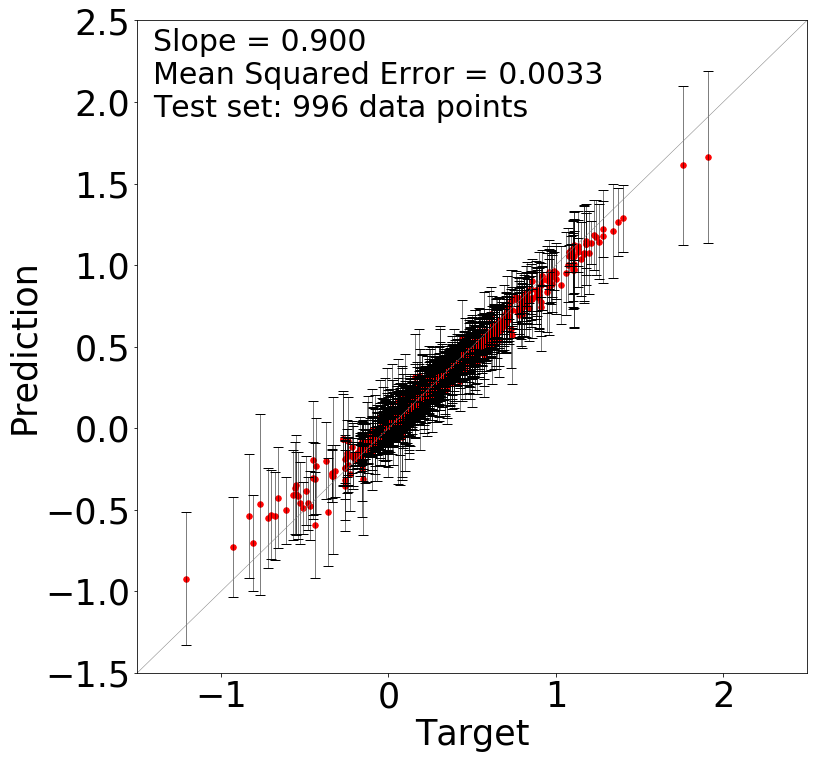

In [89]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.900', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0033', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 996 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()